In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import pandas as pd
from ast import literal_eval
import textwrap as tw

datasets_names = ["rts", "pdl", "ioc", "mjf"]
algo_names = ["tsne", "umap", "trimap", "pacmap"]

In [14]:
# Load evaluation results
evaluation_results_df = []

N_POINTS = 60000

for dataset in datasets_names:
    results = os.listdir(f"results/{dataset}")
    results = [r for r in results if r.endswith(".csv")]
    for result in results:
        if str(N_POINTS) not in result:
            continue
        print(f"Loading results/{dataset}/{result}")
        evaluation_results_df.append(pd.read_csv(f"results/{dataset}/{result}"))

print(f"Loaded {len(evaluation_results_df)} evaluation results")
evaluation_results_df = pd.concat(evaluation_results_df)
evaluation_results_df.rename(columns={"index": "dataset_algo"}, inplace=True)

evaluation_results_df["rta_local"] = evaluation_results_df["rta"].map(lambda x: eval(x)["local"][0])
evaluation_results_df["rta_global"] = evaluation_results_df["rta"].map(lambda x: eval(x)["global"][0])
evaluation_results_df["rta_all"] = evaluation_results_df["rta"].map(lambda x: eval(x)["all"][0])
evaluation_results_df.drop(columns=["rta"], inplace=True)

evaluation_results_df["dist_corr"] = evaluation_results_df["dist_corr"].map(lambda x: eval(x)[0])

evaluation_results_df.head()

Loading results/rts/eval_rts_pacmap_N60000.csv
Loading results/rts/eval_rts_trimap_N60000.csv
Loading results/rts/eval_rts_tsne_N60000.csv
Loading results/rts/eval_rts_umap_N60000.csv
Loading results/pdl/eval_pdl_pacmap_N60000.csv
Loading results/pdl/eval_pdl_trimap_N60000.csv
Loading results/pdl/eval_pdl_tsne_N60000.csv
Loading results/pdl/eval_pdl_umap_N60000.csv
Loading results/ioc/eval_ioc_pacmap_N60000.csv
Loading results/ioc/eval_ioc_trimap_N60000.csv
Loading results/ioc/eval_ioc_tsne_N60000.csv
Loading results/ioc/eval_ioc_umap_N60000.csv
Loading results/mjf/eval_mjf_pacmap_N60000.csv
Loading results/mjf/eval_mjf_trimap_N60000.csv
Loading results/mjf/eval_mjf_tsne_N60000.csv
Loading results/mjf/eval_mjf_umap_N60000.csv
Loaded 16 evaluation results


,dataset_algo,neighbor_kept_ratio,global_score,dist_corr,run_time,eval_settings,rta_local,rta_global,rta_all
0,rts_tsne_run0,0.333628,0.935409,0.184556,266.591517,"{'n_points': 60000, 'n_neighbors': 50, 'n_samp...",0.524667,0.646380,0.64692
1,rts_tsne_run1,0.333392,0.935306,0.184565,271.323282,"{'n_points': 60000, 'n_neighbors': 50, 'n_samp...",0.605000,0.642978,0.64347
2,rts_tsne_run2,0.333217,0.935270,0.185237,272.536645,"{'n_points': 60000, 'n_neighbors': 50, 'n_samp...",0.633833,0.642666,0.64312
3,rts_tsne_run3,0.333590,0.935346,0.184124,275.004447,"{'n_points': 60000, 'n_neighbors': 50, 'n_samp...",0.610500,0.645155,0.64565
4,rts_tsne_run4,0.333301,0.935342,0.185057,271.709616,"{'n_points': 60000, 'n_neighbors': 50, 'n_samp...",0.710000,0.646176,0.64668


In [15]:
scalar_metrics = ["neighbor_kept_ratio", "global_score", "rta_local", "rta_global", "rta_all", "dist_corr", "run_time"]

scalar_metrics_df = evaluation_results_df[["dataset_algo"] + scalar_metrics]
scalar_metrics_df["run"] = scalar_metrics_df["dataset_algo"].apply(lambda x: x.split("_")[2].replace("run", "")).astype(int)
scalar_metrics_df["dataset_algo"] = scalar_metrics_df["dataset_algo"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[1])
scalar_metrics_df = scalar_metrics_df.groupby(["dataset_algo"])[scalar_metrics].agg(["mean", "std"])
scalar_metrics_df.columns = ['_'.join(col).strip() for col in scalar_metrics_df.columns.values]
scalar_metrics_df = scalar_metrics_df.apply(lambda row: [(row[f"{metric}_mean"], row[f"{metric}_std"]) for metric in scalar_metrics], axis=1, result_type='expand')
scalar_metrics_df.columns = scalar_metrics
scalar_metrics_df.reset_index(inplace=True)
scalar_metrics_df["dataset"] = scalar_metrics_df["dataset_algo"].apply(lambda x: x.split("_")[0])
scalar_metrics_df["algo"] = scalar_metrics_df["dataset_algo"].apply(lambda x: x.split("_")[1])
scalar_metrics_df.head()

,dataset_algo,neighbor_kept_ratio,global_score,rta_local,rta_global,rta_all,dist_corr,run_time,dataset,algo
0,ioc_pacmap,"(0.026187413898558897, 0.0)","(0.409151661235834, 0.0)","(0.35174285714285713, 0.03566009142138317)","(0.5404260615265564, 0.0014639305721472731)","(0.540568, 0.0015004399354855795)","(0.2405991428201227, 0.000797130712508508)","(3.222450351715088, 0.10880248166437556)",ioc,pacmap
1,ioc_trimap,"(0.026161119018629296, 0.0)","(0.4091827482027899, 0.0)","(0.3648142857142857, 0.05713979797807795)","(0.5396935681977997, 0.00314168596367872)","(0.539842, 0.003146747174111391)","(0.24445598502779048, 0.0007430744112692066)","(5.501059293746948, 0.08786125682564178)",ioc,trimap
2,ioc_tsne,"(0.4816803571530647, 0.00017261562299728428)","(0.7228236289244305, 0.0006432110050039402)","(0.6139, 0.0645118058917529)","(0.6811185620238746, 0.0012900662861789472)","(0.6816500000000001, 0.0012512393855694049)","(0.2028060094441461, 0.0010239398483940993)","(165.61448602676393, 2.672074966592793)",ioc,tsne
3,ioc_umap,"(0.3223666535192267, 0.0010624203850383247)","(0.7132636209446772, 0.018341758620592164)","(0.6535333333333333, 0.10803214909505059)","(0.6832434703362399, 0.008089450434309118)","(0.683784, 0.00806275989614325)","(0.2257241799495399, 0.004881481528131968)","(7.259605407714844, 0.08646295466889903)",ioc,umap
4,mjf_pacmap,"(0.0189616895791969, 0.0)","(0.2629573959440064, 0.0)","(0.42661904761904756, 0.0395002188633105)","(0.5099513455207003, 0.0009467777533181068)","(0.50997, 0.0008681877677092575)","(0.20610608366913735, 0.00045218321111474655)","(3.1921221733093263, 0.13055055753552902)",mjf,pacmap


In [16]:
# Round all values to 3 decimal places
scalar_metrics_df_to_save = scalar_metrics_df.copy()
for metric in scalar_metrics:
    scalar_metrics_df_to_save[metric] = scalar_metrics_df_to_save[metric].apply(lambda x: (round(x[0], 3), round(x[1], 3)))
scalar_metrics_df_to_save.to_csv("results/scalar_metrics_sample60k.csv")

C:\Users\Giacomo\AppData\Local\Temp\ipykernel_3818284\3765420999.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10")


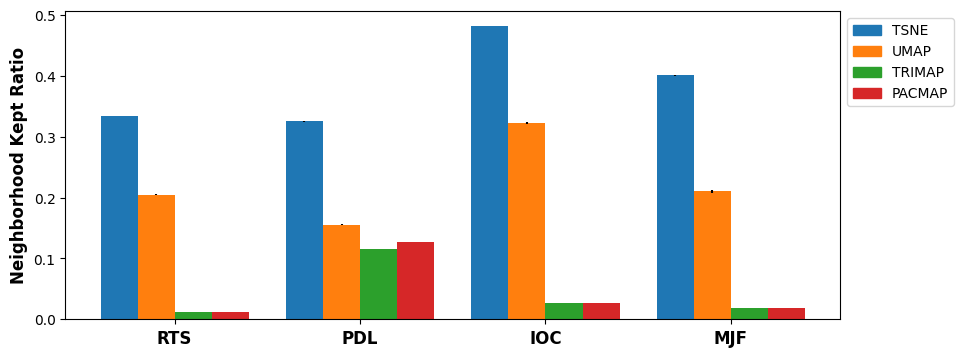

In [17]:
barwidth = 0.2
n_datasets = len(scalar_metrics_df["dataset"].unique())
n_algos = len(scalar_metrics_df["algo"].unique())
colors = plt.cm.get_cmap("tab10")
legend_patches = [mpatches.Patch(color=colors(i), label=algo.upper()) for i, algo in enumerate(algo_names)]

# Plot neighborhood preservation on single plot
fig, ax = plt.subplots(figsize=(10, 4))
for i, dataset in enumerate(datasets_names):
    for j, algo in enumerate(algo_names):
        df = scalar_metrics_df[(scalar_metrics_df["dataset"] == dataset) & (scalar_metrics_df["algo"] == algo)]
        mean,std = df["neighbor_kept_ratio"].values[0]
        ax.bar(i + j * barwidth, mean, yerr=std, width=barwidth, label=f"{algo}", color = colors(j))
ax.set_xticks(np.arange(n_datasets) + barwidth * (n_algos - 1) / 2)
ax.set_xticklabels([w.upper() for w in datasets_names], fontsize = 12, fontweight='bold')
ax.set_ylabel("Neighborhood Kept Ratio", fontsize = 12, fontweight='bold')
ax.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

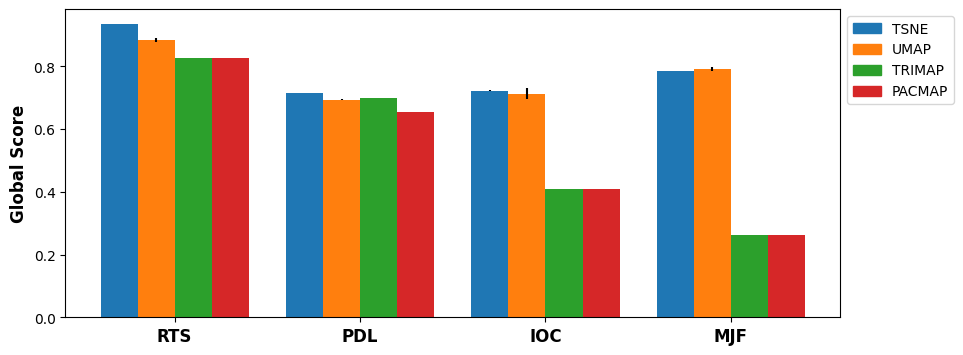

In [18]:
# Plot global score
fig, ax = plt.subplots(figsize=(10, 4))
for i, dataset in enumerate(datasets_names):
    for j, algo in enumerate(algo_names):
        df = scalar_metrics_df[(scalar_metrics_df["dataset"] == dataset) & (scalar_metrics_df["algo"] == algo)]
        mean,std = df["global_score"].values[0]
        ax.bar(i + j * barwidth, mean, yerr=std, width=barwidth, label=f"{algo}", color = colors(j))
ax.set_xticks(np.arange(n_datasets) + barwidth * (n_algos - 1) / 2)
ax.set_xticklabels([w.upper() for w in datasets_names], fontsize = 12, fontweight='bold')
ax.set_ylabel("Global Score", fontsize = 12, fontweight='bold')
ax.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

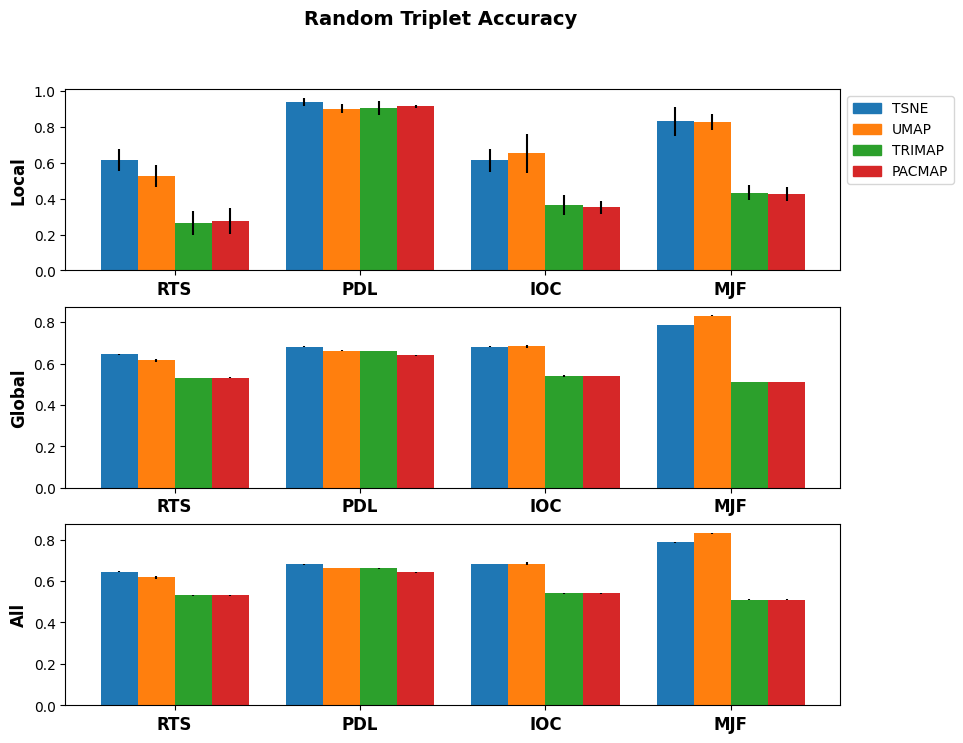

In [19]:
# Plot random triplet accuracy
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
for i, dataset in enumerate(datasets_names):
    for j, algo in enumerate(algo_names):
        df = scalar_metrics_df[(scalar_metrics_df["dataset"] == dataset) & (scalar_metrics_df["algo"] == algo)]
        # Local RTA
        mean,std = df["rta_local"].values[0]
        axs[0].bar(i + j * barwidth, mean, yerr=std, width=barwidth, label=f"{algo}", color = colors(j))
        # Global RTA
        mean,std = df["rta_global"].values[0]
        axs[1].bar(i + j * barwidth, mean, yerr=std, width=barwidth, label=f"{algo}", color = colors(j))
        # All RTA
        mean,std = df["rta_all"].values[0]
        axs[2].bar(i + j * barwidth, mean, yerr=std, width=barwidth, label=f"{algo}", color = colors(j))

for ax,label in zip(axs,["Local", "Global", "All"]):
    ax.set_xticks(np.arange(n_datasets) + barwidth * (n_algos - 1) / 2)
    ax.set_xticklabels([w.upper() for w in datasets_names], fontsize = 12, fontweight='bold')
    ax.set_ylabel(label, fontsize = 12, fontweight='bold')
plt.suptitle("Random Triplet Accuracy", fontsize = 14, fontweight='bold')
axs[0].legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

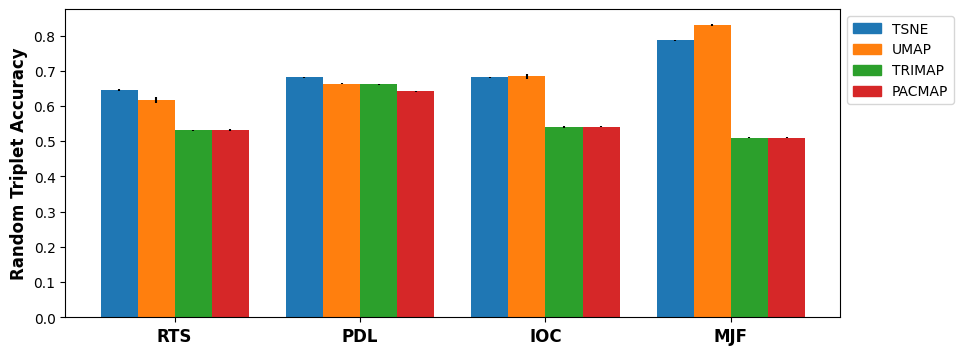

In [20]:
# Plot Random Triplet Accuracy (all)
fig, ax = plt.subplots(figsize=(10, 4))
for i, dataset in enumerate(datasets_names):
    for j, algo in enumerate(algo_names):
        df = scalar_metrics_df[(scalar_metrics_df["dataset"] == dataset) & (scalar_metrics_df["algo"] == algo)]
        mean,std = df["rta_all"].values[0]
        ax.bar(i + j * barwidth, mean, yerr=std, width=barwidth, label=f"{algo}", color = colors(j))
ax.set_xticks(np.arange(n_datasets) + barwidth * (n_algos - 1) / 2)
ax.set_xticklabels([w.upper() for w in datasets_names], fontsize = 12, fontweight='bold')
ax.set_ylabel("Random Triplet Accuracy", fontsize = 12, fontweight='bold')
ax.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

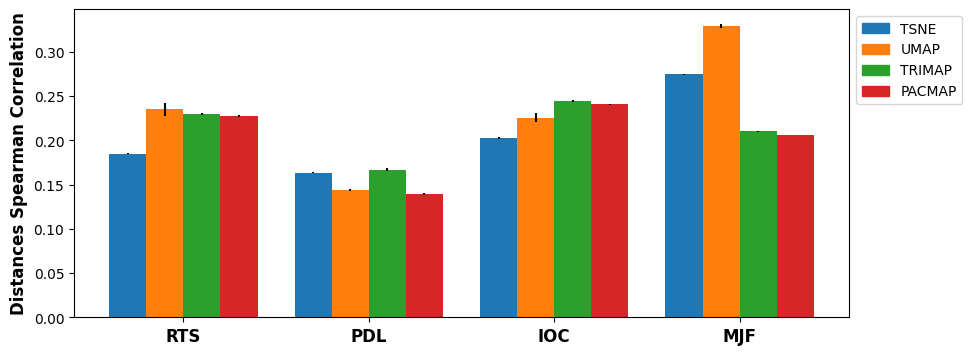

In [21]:
# Plot Spearman correlation of distances
fig, ax = plt.subplots(figsize=(10, 4))
for i, dataset in enumerate(datasets_names):
    for j, algo in enumerate(algo_names):
        df = scalar_metrics_df[(scalar_metrics_df["dataset"] == dataset) & (scalar_metrics_df["algo"] == algo)]
        mean,std = df["dist_corr"].values[0]
        ax.bar(i + j * barwidth, np.abs(mean), yerr=std, width=barwidth, label=f"{algo}", color = colors(j))
ax.set_xticks(np.arange(n_datasets) + barwidth * (n_algos - 1) / 2)
ax.set_xticklabels([w.upper() for w in datasets_names], fontsize = 12, fontweight='bold')
ax.set_ylabel("Distances Spearman Correlation", fontsize = 12, fontweight='bold')
ax.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

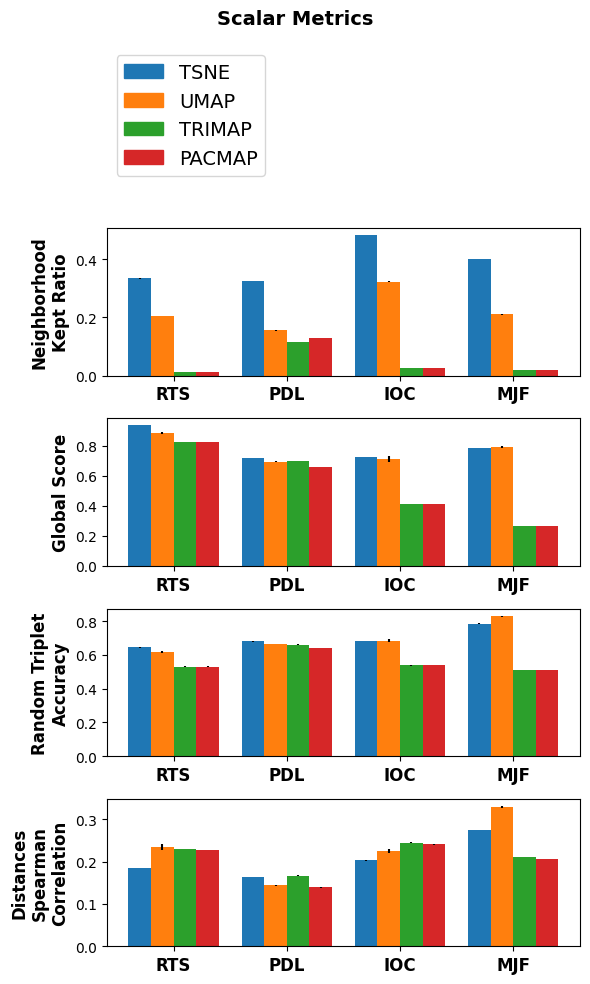

In [36]:
# Single plot for all scalar metrics, in a column
metrics_to_plot = ["neighbor_kept_ratio", "global_score", "rta_all", "dist_corr"]
metrics_labels = ["Neighborhood Kept Ratio", "Global Score", "Random Triplet Accuracy", "Distances Spearman Correlation"]
fig, axs = plt.subplots(len(metrics_to_plot) + 1, 1, figsize=(6, 10))
for i, metric in enumerate(metrics_to_plot):
    for j, dataset in enumerate(datasets_names):
        for k, algo in enumerate(algo_names):
            df = scalar_metrics_df[(scalar_metrics_df["dataset"] == dataset) & (scalar_metrics_df["algo"] == algo)]
            mean,std = df[metric].values[0]
            axs[i+1].bar(j + k * barwidth, mean, yerr=std, width=barwidth, label=f"{algo}", color = colors(k))
    axs[i+1].set_xticks(np.arange(n_datasets) + barwidth * (n_algos - 1) / 2)
    axs[i+1].set_xticklabels([w.upper() for w in datasets_names], fontsize = 12, fontweight='bold')
    axs[i+1].set_ylabel(tw.fill(metrics_labels[i], 15), fontsize = 12, fontweight='bold')
plt.suptitle("Scalar Metrics", fontsize = 14, fontweight='bold')
axs[0].legend(handles=legend_patches, loc="lower left", fontsize = 14)
axs[0].axis("off")
plt.tight_layout()
plt.show()

# MNIST DATA

In [11]:
# Load evaluation results
evaluation_results_df = []

N_POINTS = 70000

dataset = "mnist"
results = os.listdir(f"results/{dataset}")
results = [r for r in results if r.endswith(".csv")]
for result in results:
    if str(N_POINTS) not in result:
        continue
    print(f"Loading results/{dataset}/{result}")
    evaluation_results_df.append(pd.read_csv(f"results/{dataset}/{result}"))

print(f"Loaded {len(evaluation_results_df)} evaluation results")
evaluation_results_df = pd.concat(evaluation_results_df)
evaluation_results_df.rename(columns={"index": "dataset_algo"}, inplace=True)

evaluation_results_df["rta_local"] = evaluation_results_df["rta"].map(lambda x: eval(x)["local"][0])
evaluation_results_df["rta_global"] = evaluation_results_df["rta"].map(lambda x: eval(x)["global"][0])
evaluation_results_df["rta_all"] = evaluation_results_df["rta"].map(lambda x: eval(x)["all"][0])
evaluation_results_df.drop(columns=["rta"], inplace=True)

evaluation_results_df["dist_corr"] = evaluation_results_df["dist_corr"].map(lambda x: eval(x)[0])

evaluation_results_df.head()

Loading results/mnist/eval_mnist_pacmap_N70000.csv
Loading results/mnist/eval_mnist_trimap_N70000.csv
Loading results/mnist/eval_mnist_tsne_N70000.csv
Loading results/mnist/eval_mnist_umap_N70000.csv
Loaded 4 evaluation results


,dataset_algo,neighbor_kept_ratio,global_score,dist_corr,run_time,eval_settings,rta_local,rta_global,rta_all
0,mnist_pacmap_run0,0.014459,0.797208,0.213525,1.364553,"{'n_points': 70000, 'n_neighbors': 50, 'n_samp...",0.308333,0.612106,0.61232
1,mnist_pacmap_run1,0.014459,0.797208,0.212752,1.377911,"{'n_points': 70000, 'n_neighbors': 50, 'n_samp...",0.485500,0.612247,0.61255
2,mnist_pacmap_run2,0.014459,0.797208,0.213292,1.406179,"{'n_points': 70000, 'n_neighbors': 50, 'n_samp...",0.416333,0.615291,0.61561
3,mnist_pacmap_run3,0.014459,0.797208,0.213103,1.390692,"{'n_points': 70000, 'n_neighbors': 50, 'n_samp...",0.337500,0.611506,0.61174
4,mnist_pacmap_run4,0.014459,0.797208,0.211655,1.377810,"{'n_points': 70000, 'n_neighbors': 50, 'n_samp...",0.366000,0.612144,0.61239


In [12]:
scalar_metrics = ["neighbor_kept_ratio", "global_score", "rta_local", "rta_global", "rta_all", "dist_corr", "run_time"]

scalar_metrics_df = evaluation_results_df[["dataset_algo"] + scalar_metrics]
scalar_metrics_df["run"] = scalar_metrics_df["dataset_algo"].apply(lambda x: x.split("_")[2].replace("run", "")).astype(int)
scalar_metrics_df["dataset_algo"] = scalar_metrics_df["dataset_algo"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[1])
scalar_metrics_df = scalar_metrics_df.groupby(["dataset_algo"])[scalar_metrics].agg(["mean", "std"])
scalar_metrics_df.columns = ['_'.join(col).strip() for col in scalar_metrics_df.columns.values]
scalar_metrics_df = scalar_metrics_df.apply(lambda row: [(row[f"{metric}_mean"], row[f"{metric}_std"]) for metric in scalar_metrics], axis=1, result_type='expand')
scalar_metrics_df.columns = scalar_metrics
scalar_metrics_df.reset_index(inplace=True)
scalar_metrics_df["dataset"] = scalar_metrics_df["dataset_algo"].apply(lambda x: x.split("_")[0])
scalar_metrics_df["algo"] = scalar_metrics_df["dataset_algo"].apply(lambda x: x.split("_")[1])
scalar_metrics_df.head()

,dataset_algo,neighbor_kept_ratio,global_score,rta_local,rta_global,rta_all,dist_corr,run_time,dataset,algo
0,mnist_pacmap,"(0.014459047619047599, 0.0)","(0.797208, 0.0)","(0.38273333333333326, 0.06991310082285482)","(0.6126586957560286, 0.001499974735957674)","(0.612922, 0.001533482963713668)","(0.21286537595182048, 0.0007334674371959699)","(1.3834288597106934, 0.01572140656291245)",mnist,pacmap
1,mnist_trimap,"(0.0141690476190476, 0.0)","(0.8181764000000001, 0.0)","(0.36533333333333334, 0.09366770462058353)","(0.6186137818061443, 0.0019047948004364266)","(0.61886, 0.0019109814232482379)","(0.2096061492992191, 0.000490436734474257)","(2.273552894592285, 0.02945776710686551)",mnist,trimap
2,mnist_tsne,"(0.3437489523809524, 5.6393298197854e-05)","(0.90751676, 3.4180503214521676e-05)","(0.5707666666666666, 0.12142364999363915)","(0.6208021602836231, 0.0016235783683630853)","(0.621358, 0.0015860548540326067)","(0.14814680440107827, 0.0006709889627052808)","(193.28916535377502, 25.875380343460055)",mnist,tsne
3,mnist_umap,"(0.15570180952380946, 0.00038475813293769695)","(0.910170698, 0.0010759613979227844)","(0.4829333333333333, 0.06458818261364327)","(0.6082657465339464, 0.0017710899481984716)","(0.608796, 0.0017959064563612382)","(0.15232894374858527, 0.002230107723239646)","(7.518386363983154, 0.40764203066855487)",mnist,umap


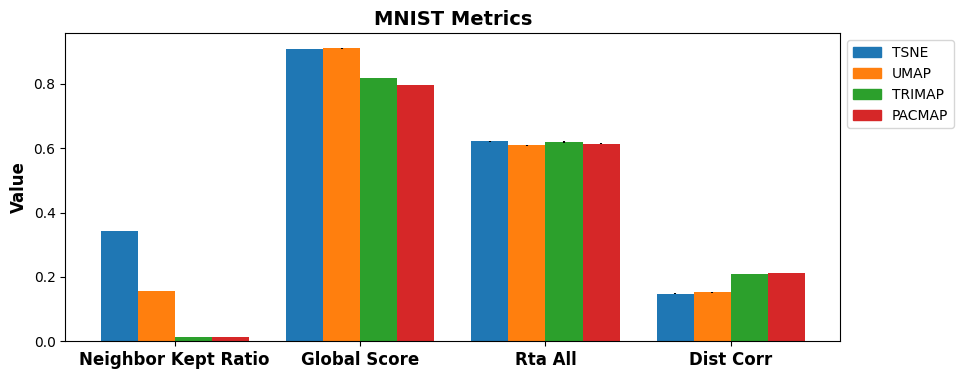

In [13]:
bariwdth = 0.2
metrics_to_plot = ["neighbor_kept_ratio", "global_score", "rta_all", "dist_corr"]

# Plot MNIST metrics on single plot
fig, ax = plt.subplots(figsize=(10, 4))
for i, metric in enumerate(metrics_to_plot):
    for j, algo in enumerate(algo_names):
        df = scalar_metrics_df[(scalar_metrics_df["dataset"] == "mnist") & (scalar_metrics_df["algo"] == algo)]
        mean,std = df[metric].values[0]
        ax.bar(i + j * barwidth, mean, yerr=std, width=barwidth, label=f"{algo}", color = colors(j))
ax.set_xticks(np.arange(len(metrics_to_plot)) + barwidth * (n_algos - 1) / 2)
ax.set_xticklabels([w.replace("_", " ").title() for w in metrics_to_plot], fontsize = 12, fontweight='bold')
ax.set_ylabel("Value", fontsize = 12, fontweight='bold')
ax.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1))
plt.title("MNIST Metrics", fontsize = 14, fontweight='bold')
plt.show()

## Metrics at rank k

In [ ]:
metrics_at_k = ["t_values", "c_values", "lcmc_values"]
at_k_metrics = evaluation_results_df[["dataset_algo"] + metrics_at_k]
at_k_metrics["dataset"] = at_k_metrics["dataset_algo"].apply(lambda x: x.split("_")[0])
at_k_metrics["algo"] = at_k_metrics["dataset_algo"].apply(lambda x: x.split("_")[1])
at_k_metrics["run"] = at_k_metrics["dataset_algo"].apply(lambda x: x.split("_")[2].replace("run", "")).astype(int)

at_k_metrics.head()

In [ ]:
k_values = np.arange(0,len(at_k_metrics["t_values"].values[0]))
k_metrics_handles = []
k_metrics_colors = plt.cm.get_cmap("tab20", len(algo_names) * len(datasets_names))

fig, axs = plt.subplots(3, len(datasets_names), figsize=(16, 8))

for d,dataset in enumerate(datasets_names):
    for i,algo in enumerate(algo_names):
        k_metrics_handles.append(f"{dataset}_{algo}")
        df = at_k_metrics[(at_k_metrics["dataset"] == dataset) & (at_k_metrics["algo"] == algo)]
        t_values = df["t_values"].values
        c_values = df["c_values"].values
        lcmc_values = df["lcmc_values"].values
        for j in range(len(t_values)):
            axs[0,d].scatter(k_values, t_values[j], color=colors(i), linestyle='-', marker='x', s=1)
            axs[1,d].scatter(k_values, c_values[j], color=colors(i), linestyle='-', marker='x', s=1)
            axs[2,d].scatter(k_values, lcmc_values[j], color=colors(i), linestyle='-', marker='x', s=1)
        
plt.suptitle("Metrics at K", fontsize = 14, fontweight='bold')
axs[0,0].set_ylabel("Trustworthiness", fontsize = 12, fontweight='bold')
axs[1,0].set_ylabel("Continuity", fontsize = 12, fontweight='bold')
axs[2,0].set_ylabel("LCMC", fontsize = 12, fontweight='bold')
# Shared x axis labels
for ax in axs.flat:
    ax.set_xlabel("K", fontsize = 12, fontweight='bold')

axs[0,3].legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()